# Student Performance (Multiple Linear Regression)
Dataset link - https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('data\Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


## Data Cleaning

In [4]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

No Null-Values

In [5]:
def clean_extracurr(x):
    """
    dfdf
    """
    if x == 'Yes':
        return 1
    else:
        return 0

data['Extracurricular Activities'] = data['Extracurricular Activities'].apply(clean_extracurr)

In [6]:
def remove_spaces(x):
    """
    dfdf
    """
    return x.replace(' ', '_')

data.columns = map(remove_spaces,data.columns)

## Exploratory Data Analysis

In [7]:
data.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [68]:
def univariate(var):
    fig, ax = plt.subplots(2,1, figsize=(8,8))
    sns.histplot(data, x=var, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=var, ax=ax[1])
    ax[0].set_ylabel("Frequency")
    ax[1].set_xlabel(var)
    
    fig.show()

C:\Users\91807\AppData\Local\Temp\ipykernel_19624\3226633359.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


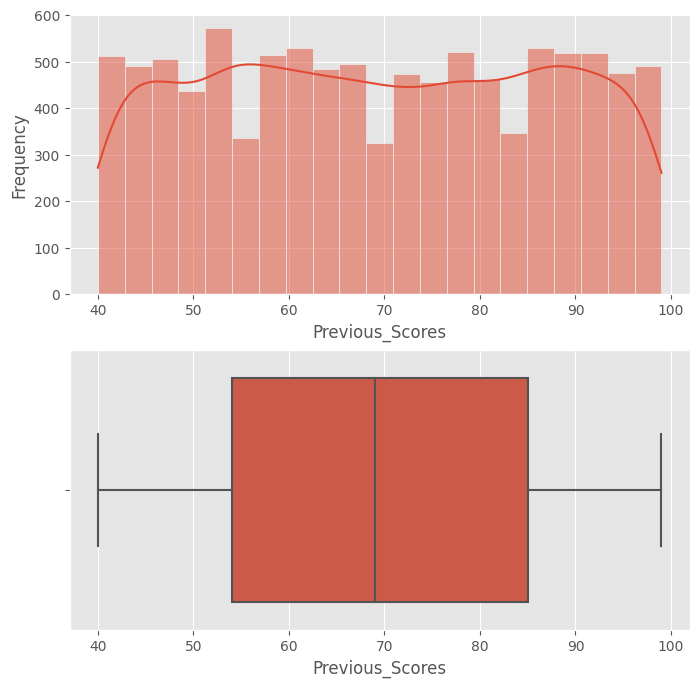

In [69]:
univariate('Previous_Scores')

C:\Users\91807\AppData\Local\Temp\ipykernel_19624\3226633359.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


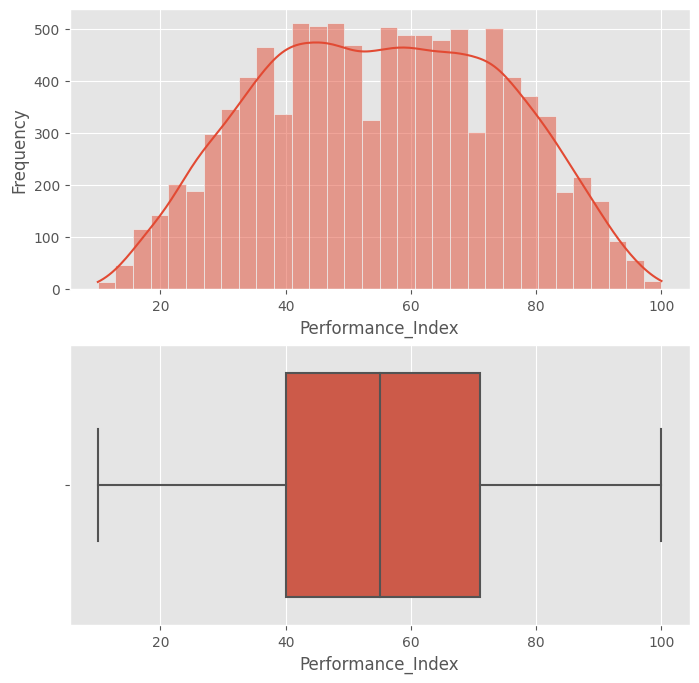

In [70]:
univariate('Performance_Index')

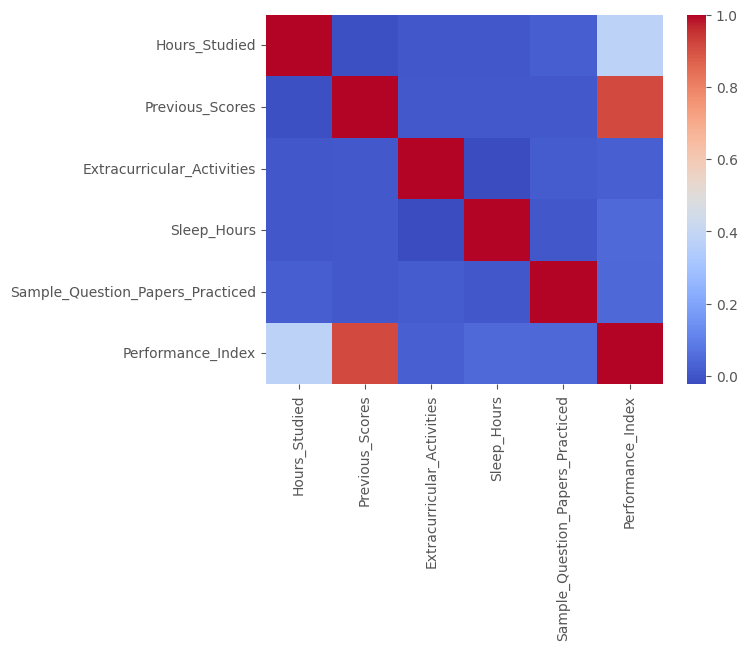

In [59]:
sns.heatmap(data.corr(), cmap="coolwarm")
plt.show()
# using a heatmap cause im lazy :-) 

Most Features dont appear to be strongly correlated 

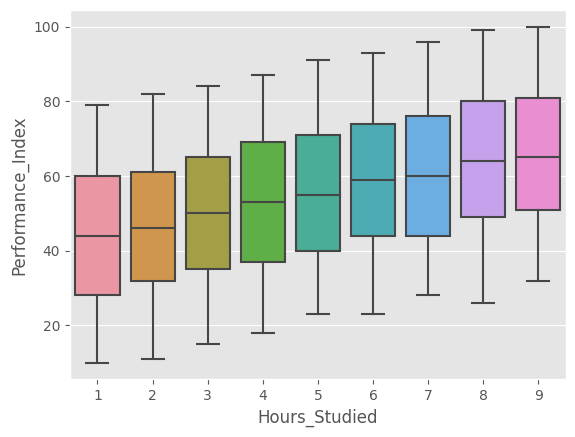

In [49]:
sns.boxplot(x='Hours_Studied', y='Performance_Index', data=data)
plt.show()

In [10]:
corr = data['Hours_Studied'].corr(data['Performance_Index'])
print(f'Correlation between the 2 variables : { corr }')

Correlation between the 2 variables : 0.37373035069872373


Conclusion 1: Hours Studied is **slightly** correlated to a higher performance index

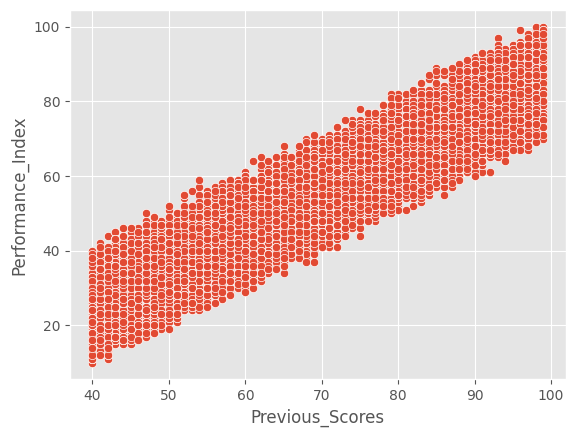

In [11]:
sns.scatterplot(x='Previous_Scores', y='Performance_Index', data=data)
plt.show()

In [12]:
corr = data['Previous_Scores'].corr(data['Performance_Index'])
print(f'Correlation between the 2 variables : { corr }')

Correlation between the 2 variables : 0.9151891412264476


Conclusion 1: Hours Studied is **highly** correlated to a higher performance index. Past Performance is a good measure for the performance index

## Asking Questions!
1. Does involvement in Extracurricular affect Performance Index?
2. How much sleep do the top students get?
3. How many/if any sample papers are required?

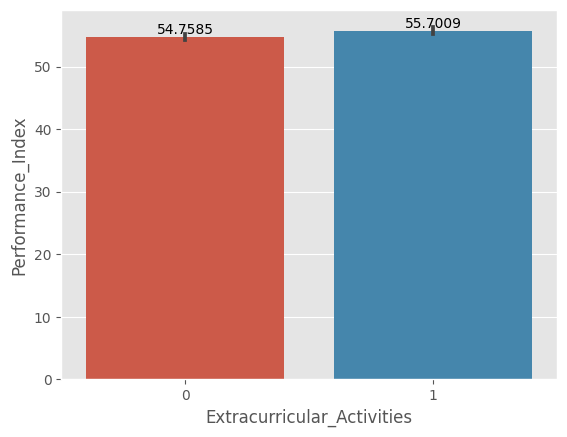

In [62]:
ax = sns.barplot(x='Extracurricular_Activities',y='Performance_Index', data=data)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [14]:
top_5_per_index = data['Performance_Index'].quantile(q=0.99)
top = data[data['Performance_Index'] >= top_5_per_index]
top = top.sort_values(by=['Performance_Index'], ascending=False)
top.head(5)

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
145,9,98,1,7,7,100.0
2070,9,98,1,4,5,100.0
2725,9,99,1,8,8,100.0
1077,9,98,1,9,8,99.0
7348,9,99,1,8,1,99.0


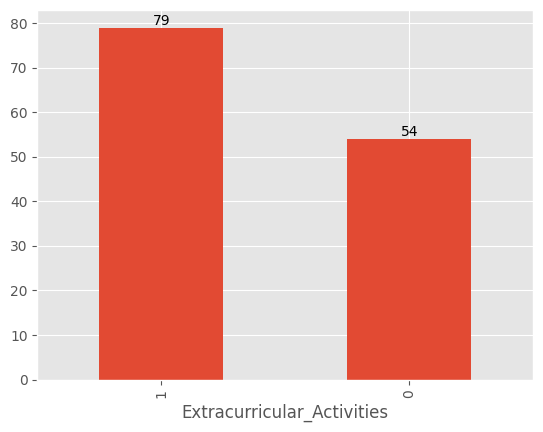

In [15]:
ax = top['Extracurricular_Activities'].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Conclusion to 1 - By Studied data of student whose performance Index is in the 99 %ile we conclude that student who participate in Extracurricular Activities scores more than the other.

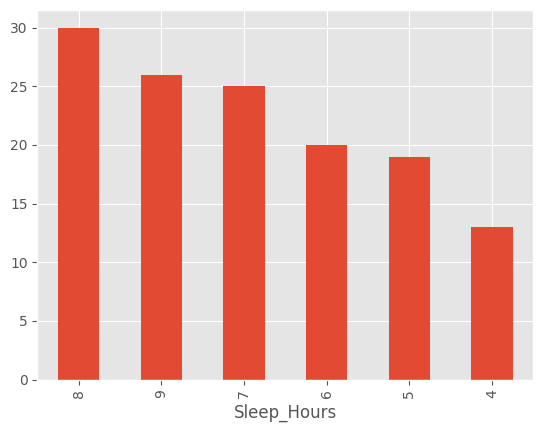

In [16]:
top['Sleep_Hours'].value_counts().plot(kind='bar')
plt.show()

In [17]:
average_sleep = top['Sleep_Hours'].mean()
print(f'Average Sleeping Hours - {round(average_sleep)}')

Average Sleeping Hours - 7


Conclusion to 2: Average Sleep for the top 1% students = 7

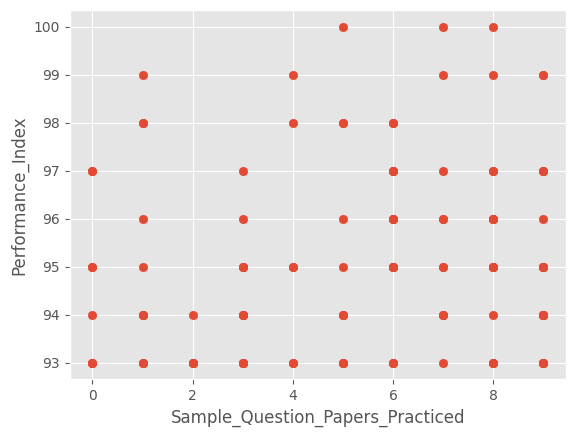

In [72]:
plt.scatter(top['Sample_Question_Papers_Practiced'],top['Performance_Index'])
plt.xlabel('Sample_Question_Papers_Practiced')
plt.ylabel('Performance_Index')
plt.show()

In [19]:
sample_papers_avg = round(data['Sample_Question_Papers_Practiced'].mean())
print(f'Average Sample Question Papers Practiced - {sample_papers_avg}')

Average Sample Question Papers Practiced - 5


Conclusion to 3: Average Sample Question Papers Practiced for the top 1% students = 5

## Model Building

In [20]:
X = data.drop('Performance_Index', axis=1)
y = data['Performance_Index']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,shuffle = True,random_state=42)

In [21]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#### Model Testing

In [22]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true,predicted)
    r2_square = r2_score(true,predicted)
    return mae,mse,r2_square

In [23]:
pred_train = model.predict(x_train)
print(f'Training data - {evaluate_model(y_train,pred_train)}')
pred_test = model.predict(x_test)
print(f'Testing data - {evaluate_model(y_test,pred_test)}')
print(f'\nw = {model.coef_} \nb = {model.intercept_}')

Training data - (1.617763256998119, 4.155977580311343, 0.9887468937857731)
Testing data - (1.6164263334740685, 4.130001963124561, 0.9887619554692855)

w = [2.85346713 1.01760061 0.59736784 0.4726969  0.18950607] 
b = -33.93024107205916


## Exporting the Model

In [24]:
exp_data = {'model': model}
with open('model.pk1', 'wb') as file:
    pickle.dump(exp_data, file)

In [48]:
with open('model.pk1', 'rb') as file:
    exp_data = pickle.load(file)
# testing   
reg = exp_data['model']
performance = reg.predict(np.array([[4.0, 82.0, 0.0, 4.0, 2.0]]))
performance

C:\Users\91807\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63.19667743])